<a href="https://colab.research.google.com/github/RewinaB/HR-Data-Analysis/blob/main/PCA_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Principle Component Analysis (PCA)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [5]:
rand_state= 1000

---
## PCA application: Wine dataset
* The dataset is called wine and it is a famous one in Machine Learning community.
* More on wine data set: http://archive.ics.uci.edu/ml/datasets/wine

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Wine.csv')

In [7]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [10]:
df.groupby(['Customer_Segment']).mean().round(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Customer_Segment,,,,,,,,,,,,,
1,13.74,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,5.53,1.06,3.16,1115.71
2,12.28,1.93,2.24,20.24,94.55,2.26,2.08,0.36,1.63,3.09,1.06,2.79,519.51
3,13.15,3.33,2.44,21.42,99.31,1.68,0.78,0.45,1.15,7.40,0.68,1.68,629.90


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df.drop('Customer_Segment', axis=1, inplace=False)
X = sc.fit_transform(X)

In [12]:
X.shape

(178, 13)

## PCA with SKlearn

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [15]:
pca.n_features_

13

In [16]:
pca.n_components_

2

In [17]:
# loadings
loadings = pca.components_
loadings.shape

(2, 13)

In [18]:
# let's look at the first 2 PC loadings
loadings[0:2]

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [19]:
# scores
scores= pca.fit_transform(X)
scores.shape


(178, 2)

----
### Proportion Variance Explained - Scree plot

There are 3 different ways to calculate the PVE:
1. built in method from sklearn PCA (this doesn't work for Kernel PCA)
2. finding the contribution of each eigenvalue to the sum of all eigenvalues (this only works if n_components = n_features)
3. finding the PVE by looking at proportional variance in the scores (transformed data) - the only method that works for Kernel PCA

In [20]:
# 1 built in method from sklearn PCA (this doesn't work for Kernel PCA)
pca.explained_variance_ratio_ # percentage of variance explained by each PC

array([0.36198848, 0.1920749 ])

In [21]:
pca.explained_variance_ # amount of variance explained by each PC

array([4.73243698, 2.51108093])

- - -
2. finding the contribution of each eigenvalue to the sum of all eigenvalues (this also doesn't work for Kernel PCA)


In [22]:
X.shape

(178, 13)

In [23]:
cov=pca.get_covariance() # Estimated covariance of data.
# or alternatively, cov= np.cov(X.T)

In [24]:
cov.shape

(13, 13)

In [25]:
from numpy import linalg
eigval , eigvec = linalg.eig(cov)

In [26]:
eigval

array([0.52999349, 2.51108093, 4.73243698, 0.52999349, 0.52999349,
       0.52999349, 0.52999349, 0.52999349, 0.52999349, 0.52999349,
       0.52999349, 0.52999349, 0.52999349])

In [27]:
eigval/sum(eigval)

array([0.04053969, 0.1920749 , 0.36198848, 0.04053969, 0.04053969,
       0.04053969, 0.04053969, 0.04053969, 0.04053969, 0.04053969,
       0.04053969, 0.04053969, 0.04053969])

---

3. finding the PVE by looking at proportional variance in the scores. This is true because the Var(sum pca) = sum Var

In [28]:
scores = pca.fit_transform(X)

In [29]:
scores.shape

(178, 2)

In [30]:
score_var = np.var(scores,axis=0) # axis=0 means along the column
score_var

array([4.70585025, 2.49697373])

In [31]:
score_var/ sum(score_var)

array([0.65333406, 0.34666594])

----

# Scree Plot

In [32]:
PVE=pd.DataFrame({'Principal Component':range(1,pca.n_components+1), 'PVE':pca.explained_variance_ratio_ })
PVE['cum_PVE']= np.cumsum(PVE['PVE'])
PVE

,Principal Component,PVE,cum_PVE
0,1,0.361988,0.361988
1,2,0.192075,0.554063


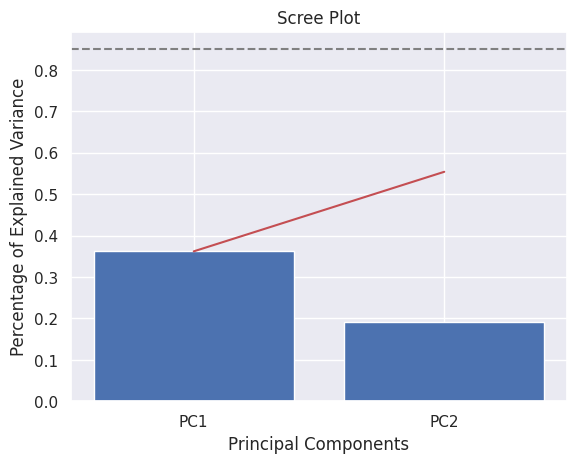

In [33]:
fig, ax = plt.subplots()
labels = [f'PC{i}' for i in PVE['Principal Component']]

plt.bar(labels, PVE['PVE'])
PVE['cum_PVE'].plot(kind='line', color='r')
ax.axhline(0.85, color='grey',linestyle='dashed')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

It seems that the optimal number of PC is 6. With 6 PCs, almost 85% of variations are explained.

# BiPlot with Sklearn

In [34]:
pca=PCA(n_components=2)
pca.fit(X)
loadings = pca.components_
scores   = pca.fit_transform(X)

In [35]:
scores.shape

(178, 2)

In [36]:
loadings.shape

(2, 13)

In [37]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

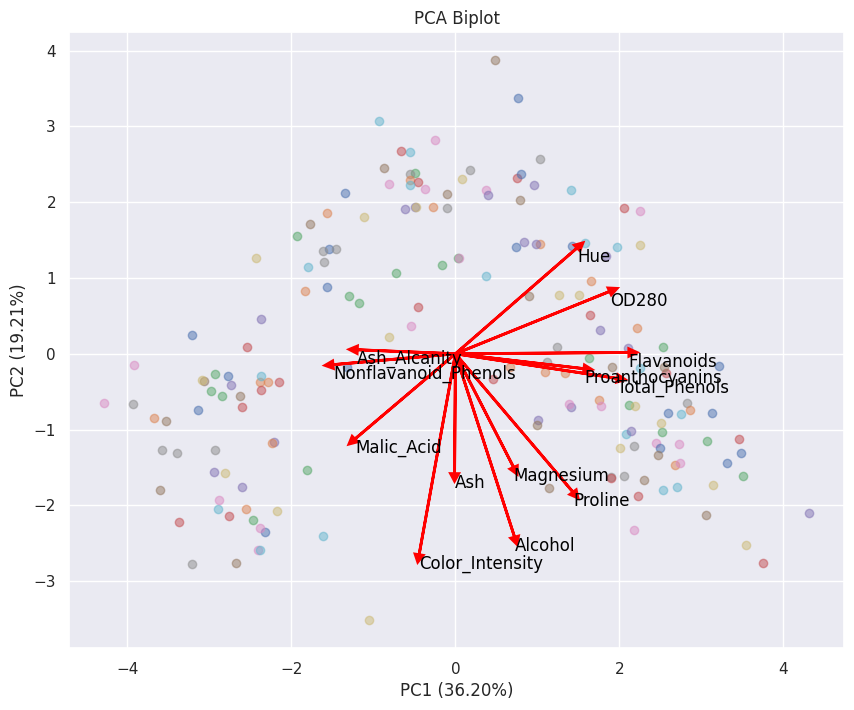

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

for i in range(scores.shape[0]):
    plt.scatter(scores[i, 0], scores[i, 1], alpha=0.5)
    #plt.text(scores[i, 0], scores[i, 1], str(i), va="bottom", ha="right")  # Adding observation labels

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
plt.title('PCA Biplot')

loading_vectors = loadings.T
arrow_size = 5
loading_vectors = loading_vectors * arrow_size

for i, v in enumerate(loading_vectors):
    plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
    plt.text(v[0], v[1], df.columns[i], color='black', ha='left', va='top')



----
## PCA Application
Now let's say we want to use PC as preprocessing the data for using a supervised ML model (logistic regression for example). Remember, the target variable is Customer_Segment with 3 classes. For illustration purposes we will use PC=2 and look at our classification boundary!

###  Logistic regressions  (X = 13 All the Features)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
y = df['Customer_Segment']
X = df.drop('Customer_Segment', axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [41]:
# Fitting Logistic Regression to the Training set
logistic = LogisticRegression(multi_class='auto')
logistic.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Predicting the Test set results
y_pred_test = logistic.predict(X_test)

### the Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [44]:
confusion_matrix(y_test, y_pred_test)

array([[ 9,  0,  0],
       [ 1, 16,  1],
       [ 0,  0,  9]])

In [45]:
accuracy_score(y_test, y_pred_test)

0.9444444444444444

In [46]:
f1_score(y_test,y_pred_test, average='weighted')

0.9442724458204333

###  Logistic regressions  
For visualization purposes only we pick (PC = 2 explaining 55% of variations in X)

In [47]:
pca=PCA(n_components=2)
train_scores= pca.fit_transform(X_train) # these are the scores (transformed data) in the train set
test_scores=pca.transform(X_test) # these are the scores (transformed data) in the test set

In [48]:
X_train.shape

(142, 13)

In [49]:
train_scores.shape

(142, 2)

In [50]:
# cumulative explained variance
pca.explained_variance_ratio_.cumsum()

array([0.36768289, 0.56031064])

In [51]:
logistic.fit(train_scores, y_train)

# Predicting the Test set results
y_pred_test = logistic.predict(test_scores)

In [52]:
confusion_matrix(y_test, y_pred_test)

array([[ 9,  0,  0],
       [ 1, 16,  1],
       [ 0,  0,  9]])

In [53]:
accuracy_score(y_test, y_pred_test)

0.9444444444444444

In [54]:
f1_score(y_test,y_pred_test, average='weighted') # we have 3 classes, so we need to specify the average method

0.9442724458204333

Wow!!! we got the same accuracy in the test set by using only 2 PC instead of 13 X. **This was pure chance and not common**.

**Exercise**:

1. Try n_components=3! why the accuracy descreased? what's going on?  
2. Try n_components=max features =13! what do you expect to see for accuracy? PCA with max features is basically transforming all the features without reducing the dimension. The model performance should not change.

### Advance Visualization (this part is optional)

Visualising the Training set results (in 2D of course!).

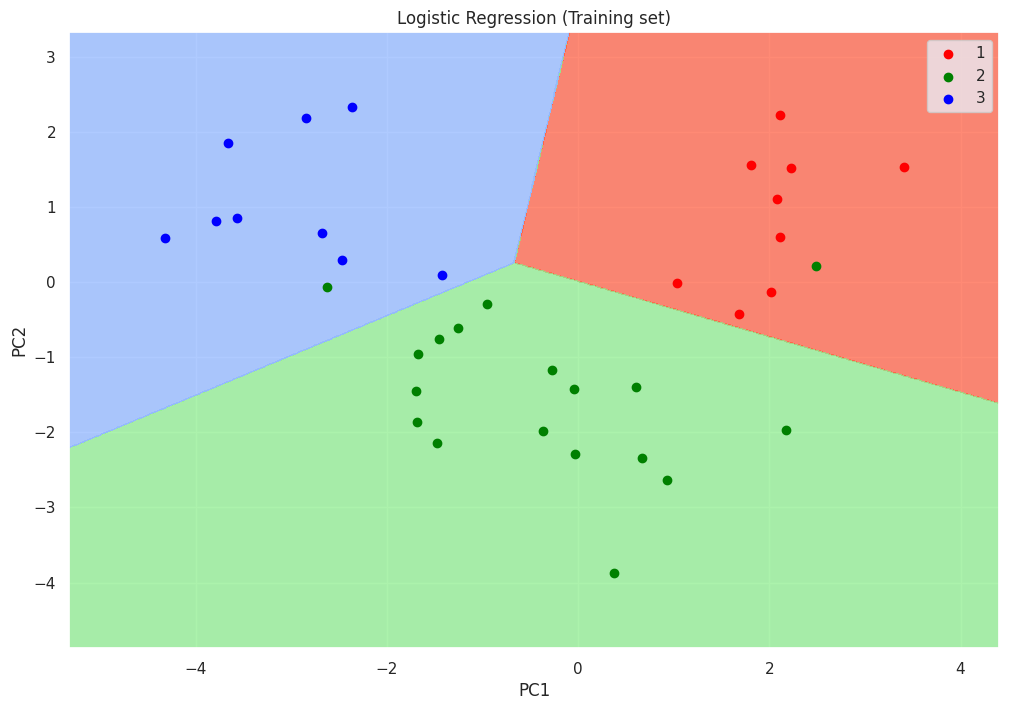

In [55]:
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = test_scores, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90','#94b9ff')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [56]:
confusion_matrix(y_test, y_pred_test)

array([[ 9,  0,  0],
       [ 1, 16,  1],
       [ 0,  0,  9]])

###  Additional links:
1. PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. PCA visualization: https://setosa.io/ev/principal-component-analysis/
3. Kernel PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
4. Kernel PCA visualization: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
5. What is Singular Value Decomposition (SVD): https://www.youtube.com/watch?v=mBcLRGuAFUk